In [1]:
#import module and data 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

airbnb = pd.read_csv('airbnb.csv')
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67936 entries, 0 to 67935
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 67936 non-null  int64 
 1   date_acc_reg        67936 non-null  object
 2   date_first_booking  67936 non-null  object
 3   gender              67936 non-null  object
 4   language_en         67936 non-null  int64 
 5   language_chn        67936 non-null  int64 
 6   country_usa         67936 non-null  int64 
 7   country_eur         67936 non-null  int64 
 8   android             67936 non-null  int64 
 9   mobile_web          67936 non-null  int64 
 10  webpage             67936 non-null  int64 
 11  ios                 67936 non-null  int64 
 12  married             67936 non-null  int64 
 13  children            67936 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 7.3+ MB


In [2]:
airbnb.head() #read first five line data

,age,date_acc_reg,date_first_booking,gender,language_en,language_chn,country_usa,country_eur,android,mobile_web,webpage,ios,married,children
0,56,9/28/2010,8/2/2010,F,1,0,1,0,1,0,1,0,1,1
1,42,12/5/2011,9/8/2012,F,1,0,0,0,0,1,1,0,0,1
2,41,9/14/2010,2/18/2010,U,1,0,1,0,1,0,1,0,0,2
3,46,1/2/2010,1/5/2010,F,1,0,1,0,1,0,1,0,0,2
4,47,1/3/2010,1/13/2010,F,1,0,1,0,1,0,1,0,1,3


In [3]:
airbnb.describe() # get descriptive statistics

,age,language_en,language_chn,country_usa,country_eur,android,mobile_web,webpage,ios,married,children
count,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000,67936.000000
mean,47.874249,0.974476,0.005947,0.713907,0.159091,0.658355,0.340423,0.895828,0.067534,0.790155,1.536696
std,146.090906,0.157711,0.076886,0.451937,0.365764,0.474265,0.473855,0.305485,0.250947,0.407201,0.836273
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,33.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,42.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000
max,2014.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


age max is 2014, which is an exception, need to be handled

In [4]:
# we assume the age of target user group is between 18-80 years old
airbnb = airbnb[airbnb['age'] >= 18]
airbnb = airbnb[airbnb['age'] <= 80]

airbnb['age'].describe()

count    66473.000000
mean        36.040483
std         10.963735
min         18.000000
25%         28.000000
50%         33.000000
75%         41.000000
max         80.000000
Name: age, dtype: float64

In [5]:
#check age distribution and the number of in each age 
airbnb['age'].value_counts() 

30    3614
31    3522
32    3445
29    3404
28    3376
      ... 
76      32
77      29
79      22
78      22
80      18
Name: age, Length: 63, dtype: int64

* Conclusion: The age of users ranges from 18 to 80, with an average age of 36 years and a median age of 33 years. Among them, users aged 28-32 are the main consumers

In [6]:
#将注册日期转变为日期时间的格式
#change date_acc_reg from object to datetime64[ns]
airbnb['date_acc_reg'] = pd.to_datetime(airbnb['date_acc_reg'])

airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66473 entries, 0 to 67935
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   age                 66473 non-null  int64         
 1   date_acc_reg        66473 non-null  datetime64[ns]
 2   date_first_booking  66473 non-null  object        
 3   gender              66473 non-null  object        
 4   language_en         66473 non-null  int64         
 5   language_chn        66473 non-null  int64         
 6   country_usa         66473 non-null  int64         
 7   country_eur         66473 non-null  int64         
 8   android             66473 non-null  int64         
 9   mobile_web          66473 non-null  int64         
 10  webpage             66473 non-null  int64         
 11  ios                 66473 non-null  int64         
 12  married             66473 non-null  int64         
 13  children            66473 non-null  int64     

Above we see the data of date_acc_reg has transformed to datetime64

In [7]:
# compute the year length of registration: 2021- x.year
airbnb['year_acc_reg'] = airbnb['date_acc_reg'].apply(lambda x: 2021 - x.year)

airbnb['year_acc_reg'].describe()

count    66473.000000
mean         8.035819
std          0.965431
min          7.000000
25%          7.000000
50%          8.000000
75%          9.000000
max         11.000000
Name: year_acc_reg, dtype: float64

In [8]:
airbnb['year_acc_reg'].value_counts()

8     25497
7     22469
9     13182
10     4307
11     1018
Name: year_acc_reg, dtype: int64

* Conslusion: the minimum year length of registration is 7 years while the longest is 11 years.

In [9]:
# handle date_first_booking in the same way
airbnb['date_first_booking'] = pd.to_datetime(airbnb['date_first_booking'])

airbnb['year_first_booking'] = airbnb['date_first_booking'].apply(lambda x: 2021 - x.year)

airbnb['year_first_booking'].describe()

count    66473.000000
mean         7.907481
std          0.995303
min          6.000000
25%          7.000000
50%          8.000000
75%          8.000000
max         11.000000
Name: year_first_booking, dtype: float64

* Conclusion: the shortest time since the first booking is 6 years and the longest is 11 years

In [10]:
# delete date_acc_reg and date_first_booking variables because they are not useful now
airbnb.drop(airbnb.select_dtypes(['datetime64']), axis = 1, inplace = True)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66473 entries, 0 to 67935
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 66473 non-null  int64 
 1   gender              66473 non-null  object
 2   language_en         66473 non-null  int64 
 3   language_chn        66473 non-null  int64 
 4   country_usa         66473 non-null  int64 
 5   country_eur         66473 non-null  int64 
 6   android             66473 non-null  int64 
 7   mobile_web          66473 non-null  int64 
 8   webpage             66473 non-null  int64 
 9   ios                 66473 non-null  int64 
 10  married             66473 non-null  int64 
 11  children            66473 non-null  int64 
 12  year_acc_reg        66473 non-null  int64 
 13  year_first_booking  66473 non-null  int64 
dtypes: int64(13), object(1)
memory usage: 7.6+ MB


In [11]:
# handle gender to be dummy variables
airbnb = pd.get_dummies(airbnb)
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66473 entries, 0 to 67935
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 66473 non-null  int64
 1   language_en         66473 non-null  int64
 2   language_chn        66473 non-null  int64
 3   country_usa         66473 non-null  int64
 4   country_eur         66473 non-null  int64
 5   android             66473 non-null  int64
 6   mobile_web          66473 non-null  int64
 7   webpage             66473 non-null  int64
 8   ios                 66473 non-null  int64
 9   married             66473 non-null  int64
 10  children            66473 non-null  int64
 11  year_acc_reg        66473 non-null  int64
 12  year_first_booking  66473 non-null  int64
 13  gender_F            66473 non-null  uint8
 14  gender_M            66473 non-null  uint8
 15  gender_U            66473 non-null  uint8
dtypes: int64(13), uint8(3)
memory usage: 7.3

In [12]:
# Observe the relationship between age and other users’ personal information
set1 = airbnb[['age', 'children', 'married', 'language_en', 'country_usa']]
set1.corr()

,age,children,married,language_en,country_usa
age,1.000000,0.095667,0.042270,0.057721,-0.026222
children,0.095667,1.000000,0.044594,0.011395,0.019058
married,0.042270,0.044594,1.000000,0.002781,0.001530
language_en,0.057721,0.011395,0.002781,1.000000,0.005160
country_usa,-0.026222,0.019058,0.001530,0.005160,1.000000


<AxesSubplot:>

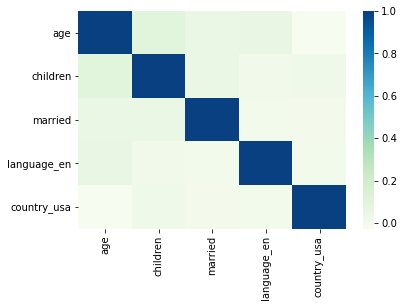

In [13]:
sns.heatmap(set1.corr(), cmap = 'GnBu')

* Conclusion: 
1. The user’s age is positively correlated with the variables of language_en and children, indicating that Airbnb is more popular in families with higher age, higher frequency of using English and more children. 

2.  Age has a negative correlation with the country_usa variable, indicating that the greater the age of the user, the less likely they are to use Airbnb in USA. 

In [14]:
set2 = airbnb[['age', 'android', 'mobile_web', 'webpage', 'ios', 'gender_F', 'gender_M']]
set2.corr()

,age,android,mobile_web,webpage,ios,gender_F,gender_M
age,1.000000,0.079089,-0.078795,0.089291,-0.073365,-0.045750,0.025568
android,0.079089,1.000000,-0.997242,0.022491,-0.035327,-0.070349,-0.156132
mobile_web,-0.078795,-0.997242,1.000000,-0.014833,0.036069,0.071656,0.156145
webpage,0.089291,0.022491,-0.014833,1.000000,-0.790675,0.022285,-0.017945
ios,-0.073365,-0.035327,0.036069,-0.790675,1.000000,-0.025997,0.029723
gender_F,-0.045750,-0.070349,0.071656,0.022285,-0.025997,1.000000,-0.705323
gender_M,0.025568,-0.156132,0.156145,-0.017945,0.029723,-0.705323,1.000000


<AxesSubplot:>

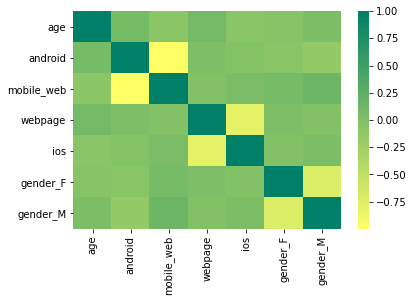

In [15]:
sns.heatmap(set2.corr(), cmap = 'summer_r')

Conclusion: 
- 1. As age increases, users will be more inclined to order on the computers.
- 2. Elder users tend to order on android phones while younger users tend to order on iPhones.
- 3. Male users prefer to order on the webpages, and they don’t like to order on Android phones.
- 4. The correlation between age and the user's ordering channel and gender is too weak, which is of little significance for subsequent analysis

In [16]:
# place these 5 index into a new varialbe for easy use
airbnb_5 = airbnb[['age', 'android', 'mobile_web', 'webpage', 'ios']]

In [17]:
# import sklearn
from sklearn.preprocessing import scale
# normalize data after scale and save to x
x = pd.DataFrame(scale(airbnb_5))

In [18]:
#使用cluster建模，先尝试分为3组
# model using cluster, try number 3
from sklearn import cluster
model = cluster.KMeans(n_clusters = 3, random_state = 10)
model.fit(x)

KMeans(n_clusters=3, random_state=10)

In [19]:
# Extract labels and view classification results
airbnb_5['cluster'] = model.labels_
airbnb_5.head(10)

<ipython-input-19-867d698c5a41>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airbnb_5['cluster'] = model.labels_


,age,android,mobile_web,webpage,ios,cluster
0,56,1,0,1,0,1
1,42,0,1,1,0,2
2,41,1,0,1,0,1
3,46,1,0,1,0,1
4,47,1,0,1,0,1
5,50,1,0,1,0,1
6,46,1,0,1,0,1
7,36,1,0,1,0,1
8,33,1,0,1,0,1
9,31,1,0,1,0,1


<AxesSubplot:xlabel='age', ylabel='ios'>

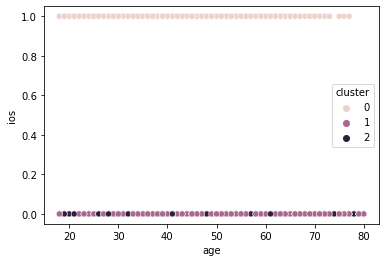

In [20]:
sns.scatterplot(x = 'age', y = 'ios', hue = 'cluster', data = airbnb_5)

In [21]:
# evaluate univariable dimension clustering effect
airbnb_5.groupby(['cluster'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,4535.0,33.067916,8.641708,18.0,27.0,31.0,37.0,77.0
1,40845.0,36.876215,11.581504,18.0,29.0,34.0,43.0,80.0
2,21093.0,35.061253,9.940771,18.0,28.0,33.0,39.0,80.0


- the age distribution of the three groups of users is between 18-80 years old, indicating that the age distinction is weak

In [22]:
airbnb_5.groupby(['cluster'])['ios'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,4535.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
1,40845.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,21093.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- ios of cluster 0 and 1 is 0，ios of cluster 2 is 1 mostly, iOS is a good grouping variable 

In [23]:
from sklearn import metrics
# distance between variable x and its coresponding cluster
x_cluster = model.fit_predict(x)

# compare x with its cluster, the higer score is, the closer it to cluster
score = metrics.silhouette_score(x, x_cluster)

print(score)

0.6335056609750385


In [24]:
# export cluster_cdenters
centers = pd.DataFrame(model.cluster_centers_)

print(centers)

          0         1         2         3         4
0 -0.271129 -0.130558  0.133297 -2.922051  3.695642
1  0.076228  0.724734 -0.725096  0.206204 -0.270589
2 -0.089316 -1.375323  1.375436  0.228944 -0.270589


- column 0, 1, 2, 3, 4 relate to age, android, mobile_web, webpage and ios
- cluster 0 and 2 are more special:
    - cluster 0 prefer order on webpage，less on android phoens. 
    - cluster 2 prefer ios,very few order via webpage. 

In [25]:
# change number of clusters from 3 to 5
from sklearn import cluster
model = cluster.KMeans(n_clusters = 5, random_state = 10)
model.fit(x)

KMeans(n_clusters=5, random_state=10)

In [26]:
#export cluster_centers_
centers = pd.DataFrame(model.cluster_centers_)
print(centers)

          0         1         2         3         4
0 -0.411262  0.727102 -0.725096  0.342225 -0.270589
1 -0.093553 -1.375323  1.379127  0.342225 -0.270589
2 -0.252821  0.053148 -0.122527 -2.922051 -0.270589
3 -0.271129 -0.130558  0.133297 -2.922051  3.695642
4  1.696794  0.707480 -0.705458  0.339802 -0.270589


- age tends to be elder 
- cluster 1 prefer order on webpage，less on android phoens.
- cluster 2 do not like order on webpages.
- cluster 3 prefer ios，very few order on webpages
- age of cluster 4 is eldest, and cluster 4 and 0 data distinction is very small, which is of little significance to actual analysis

## Summarize

- Pay attention to the heavy Airbnb users who are 28-32 years old and registered year for 6-7 years, and develop corresponding marketing strategies for customers with low responsiveness. 

- The user’s age is positively correlated with the variables of language_en and children, indicating that Airbnb is more popular in families with higher age, higher frequency of using English and more children. 

- Age has a negative correlation with the country_usa variable, indicating that the greater the age of the user, the less likely they are to use Airbnb in USA. 

- As age increases, users will be more inclined to order on the computers.
- Elder users tend to order on android phones while younger users tend to order on iPhones.
- Male users prefer to order on the webpages, and they don’t like to order on Android phones.
- The correlation between age and the user's ordering channel and gender is too weak, which is of little significance for subsequent analysis